# Survey Evaluation

In [7]:
%%bash
jq -s . results/*.json > all_results.json

In [56]:
import json
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)

In [11]:
with open("all_results.json","rb") as f:
    results = json.load(f)

In [16]:
# extract questions
o = results[0][list(results[0].keys())[0]]

In [19]:
questions = list(o.keys())

In [21]:
bin_questions = []
range_questions = []

for q in questions:
    if len(o[q]) == 1:
        range_questions.append(q)
    else:
        bin_questions.append(q)

In [22]:
bin_questions

['Is this a valid recipe?', 'Does it seem eatable?']

In [23]:
range_questions

['Are the instructions understandable? (0: totally confusing, 3: very clear)',
 'How tasty is it probably? (0: not at all, 3: very tasty)',
 'Would you cook it? (0: not at all, 3: immediately!)',
 'How creative is this recipe? (0: not at all, 3: very creative!)',
 'Is this a good combination of ingredients? (0: not at all, 3: very good!)',
 'Are the used cooking actions suitable for the ingredients? (0: not at all, 3: totally!)']

## answers for each recipe:

In [38]:
recipes = {}
for res in results:
    for r in res:
        if r in recipes:
            recipes[r] += 1
        else:
            recipes[r] = 1
sorted_recipe_names = sorted(recipes.keys())
sorted_values = [recipes[r] for r in sorted_recipe_names]

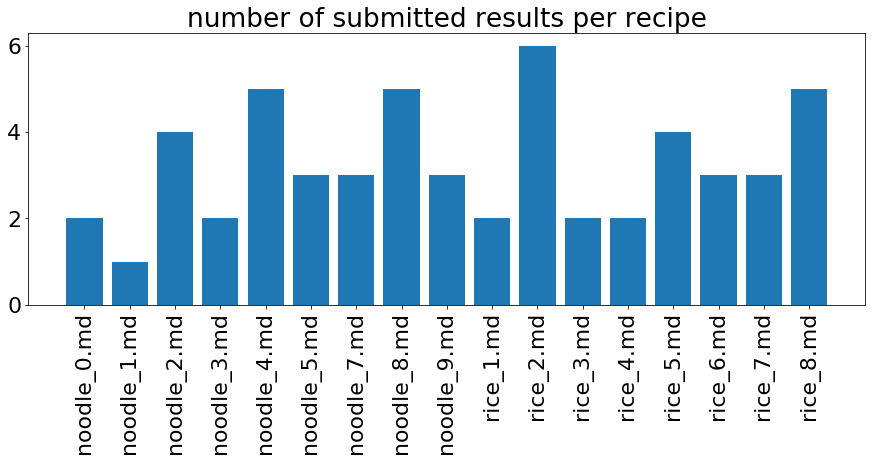

In [107]:
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams.update({'font.size': 22})
plt.bar(x = sorted_recipe_names, height=sorted_values)
plt.xticks(rotation=90)
plt.title("number of submitted results per recipe")
plt.show()

In [71]:
def get_bin_answer(q):
    yes = {}
    no = {}
    
    for r in sorted_recipe_names:
        yes[r] = 0
        no[r] = 0
    
    for res in results:
        for r in res:
            if res[r][q] == "Yes":
                yes[r] += 1
            else:
                no[r] += 1
    
    return sorted_recipe_names, [yes[r] for r in sorted_recipe_names], [no[r] for r in sorted_recipe_names]


In [75]:
def get_range_answer(q, ranges=4):
    answers = {}
    
    for r in sorted_recipe_names:
        answers[r] = [0] * ranges
    
    for res in results:
        for r in res:
            answers[r][int(res[r][q])] += 1
    
    l = []
    for i in range(ranges):
        l.append([answers[r][i] for r in sorted_recipe_names])
    
    return sorted_recipe_names, l

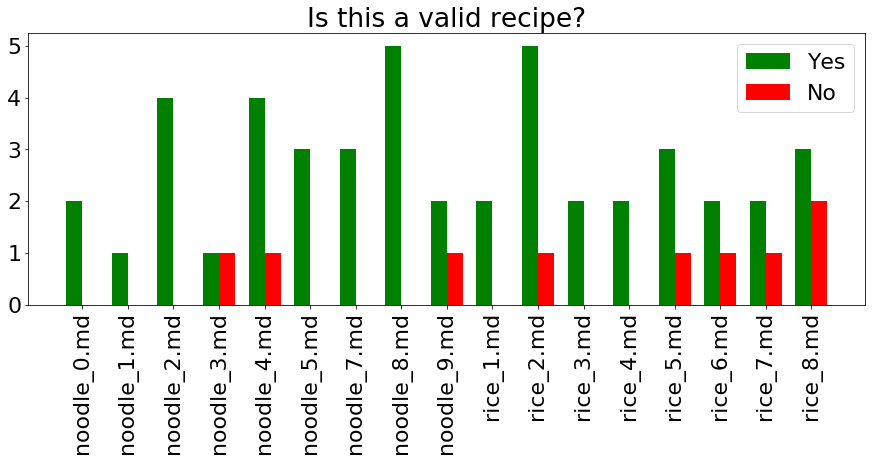

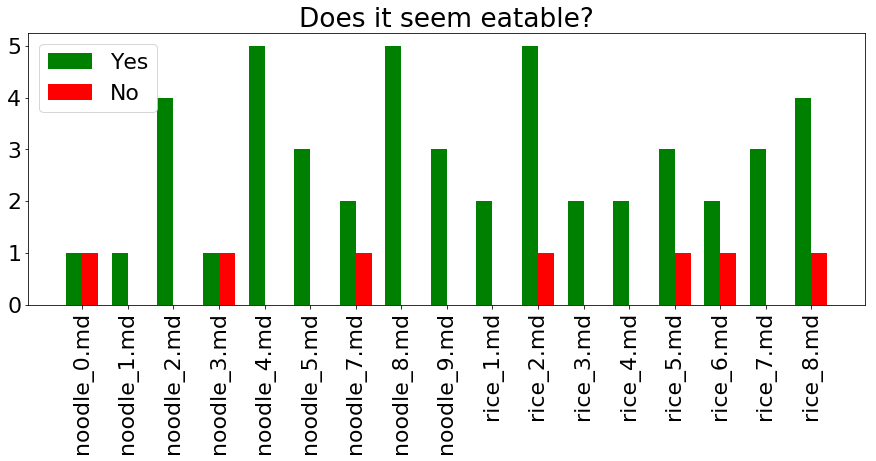

In [100]:
for q in bin_questions:
    answer = get_bin_answer(q)
    
    x = np.arange(len(sorted_recipe_names)) 

    width = 0.35  # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-width/2, height=answer[1], width=width, label="Yes", color='g')
    plt.bar(x = x+width/2, height=answer[2], width=width, label="No", color='r')
    plt.xticks(x, labels=sorted_recipe_names, rotation=90)
    plt.title(q)
    plt.legend()
    plt.show()

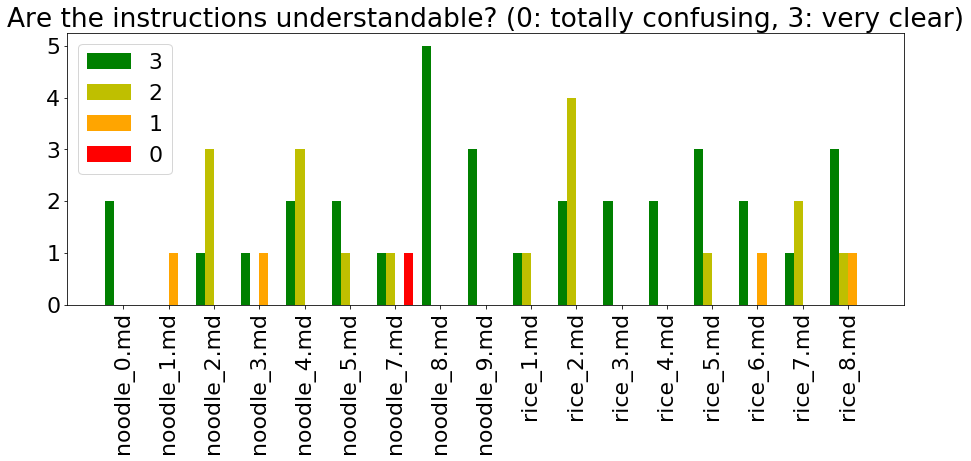

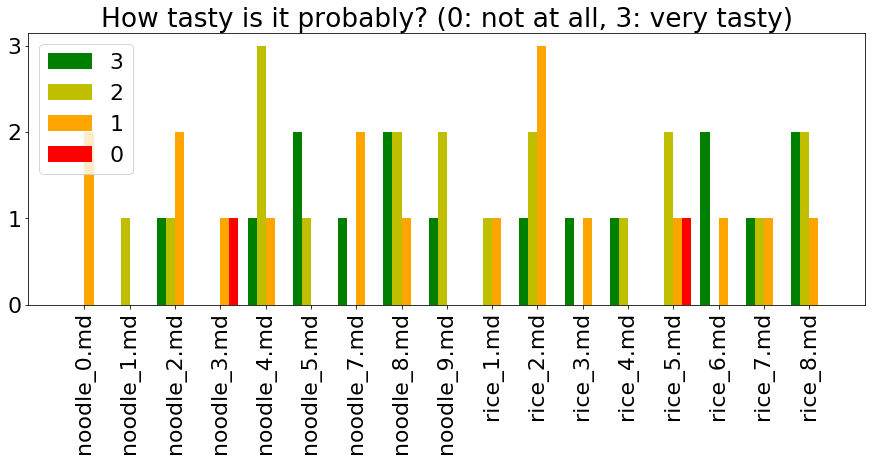

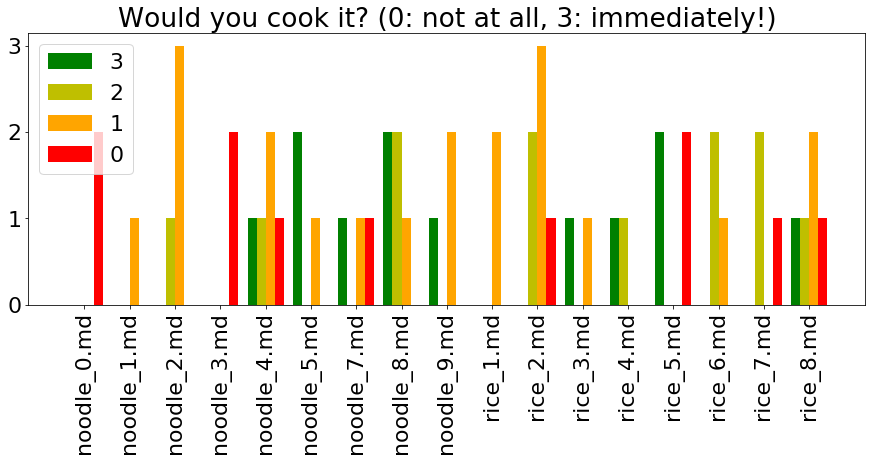

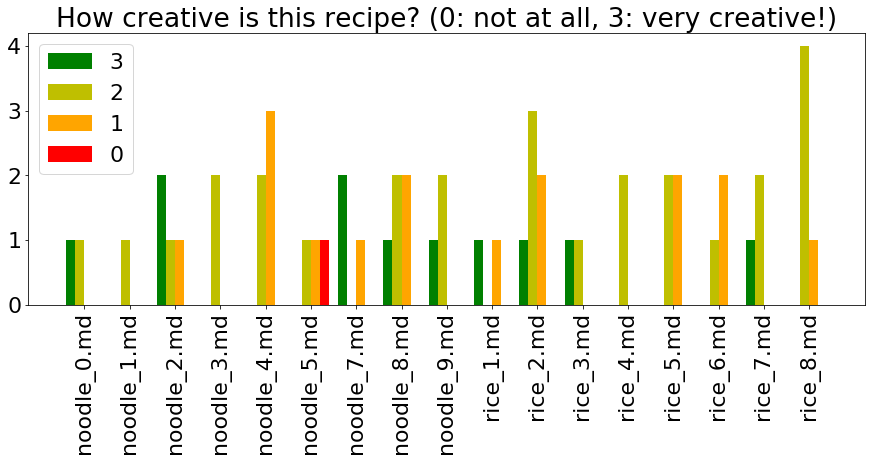

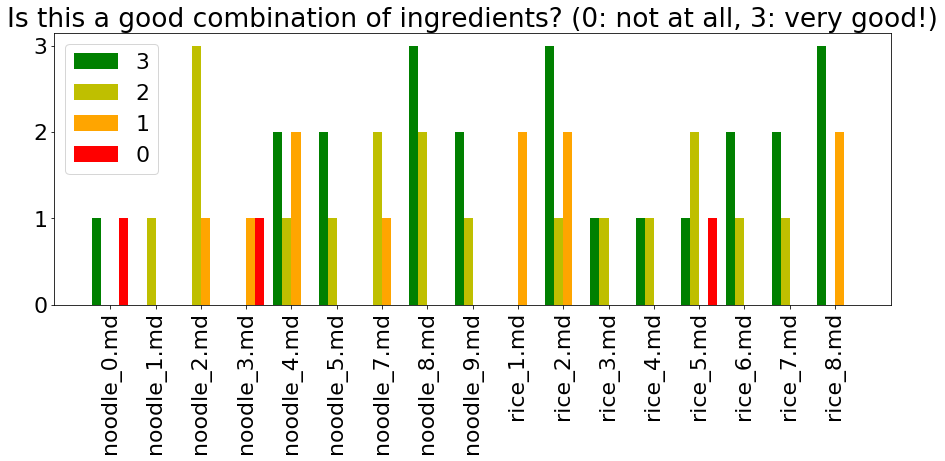

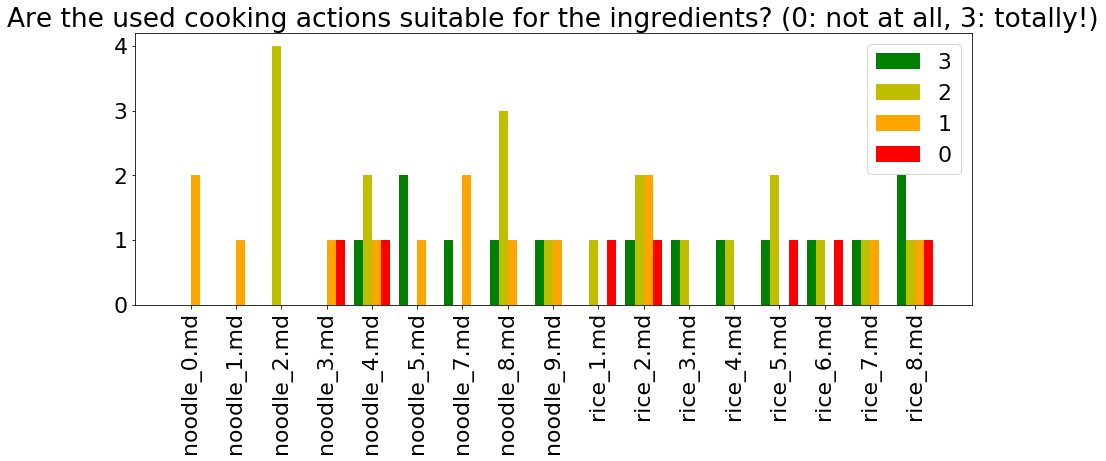

In [102]:
for q in range_questions:
    answer = get_range_answer(q)
    
    x = np.arange(len(sorted_recipe_names)) 

    width = 0.2 # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-1.5*width, height=answer[1][3], width=width, label="3", color='g')
    plt.bar(x = x-width/2, height=answer[1][2], width=width, label="2", color='y')
    plt.bar(x = x+width/2, height=answer[1][1], width=width, label="1", color = 'orange')
    plt.bar(x = x+1.5*width, height=answer[1][0], width=width, label="0", color='r')
    plt.xticks(x, labels=sorted_recipe_names, rotation=90)
    plt.title(q)
    plt.legend()
    plt.show()

## answers for each group:

In [93]:
def get_bin_group_answer(answers):
    yes = {}
    no = {}
    
    for r in sorted_recipe_names:
        grp = r.split('_')[0]
        if grp not in yes:
            yes[grp] = 0
            no[grp] = 0
    
    for res in results:
        for r in res:
            grp = r.split('_')[0]
            if res[r][q] == "Yes":
                yes[grp] += 1
            else:
                no[grp] += 1
                
    keys= list(yes.keys())
    
    return keys, [yes[r] for r in keys], [no[r] for r in keys]

In [97]:
def get_range_group_answer(q, ranges=4):
    answers = {}
    
    for r in sorted_recipe_names:
        grp = r.split('_')[0]
        if grp not in answers:
            answers[grp] = [0] * ranges
    
    for res in results:
        for r in res:
            grp = r.split('_')[0]
            answers[grp][int(res[r][q])] += 1
    
    
    keys= list(answers.keys())
    l = []
    for i in range(ranges):
        l.append([answers[r][i] for r in keys])
    
    
    
    return keys, l

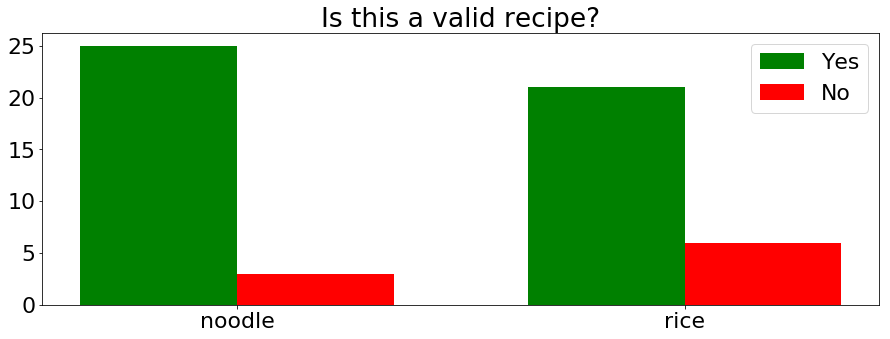

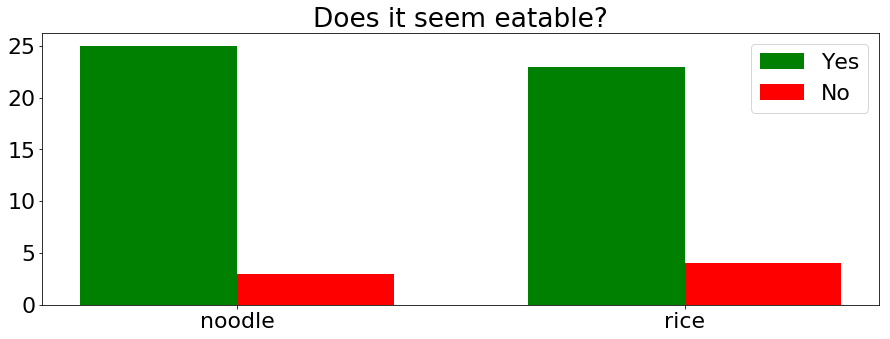

In [105]:
for q in bin_questions:
    answer = get_bin_group_answer(q)
    
    x = np.arange(len(answer[0])) 

    width = 0.35  # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-width/2, height=answer[1], width=width, label="Yes", color='g')
    plt.bar(x = x+width/2, height=answer[2], width=width, label="No", color='r')
    plt.xticks(x, labels=answer[0], rotation=0)
    plt.title(q)
    plt.legend()
    plt.show()

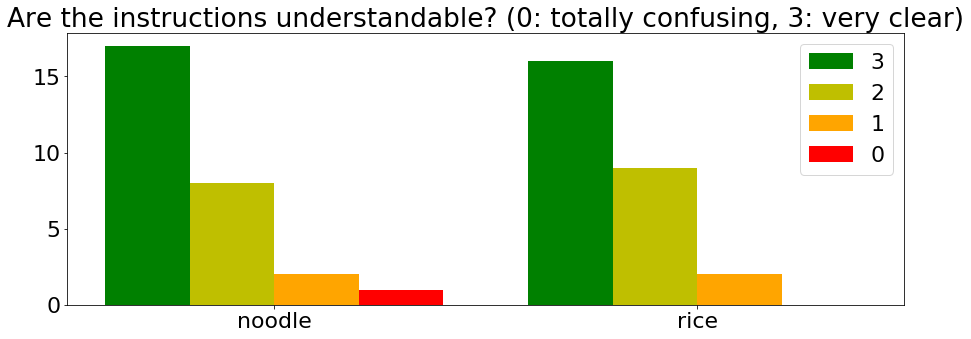

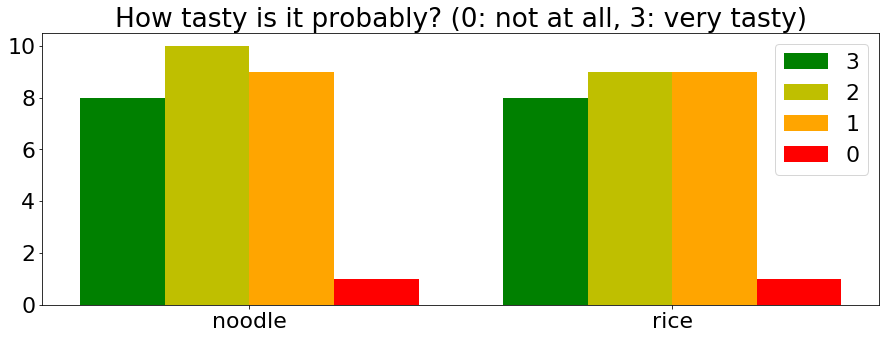

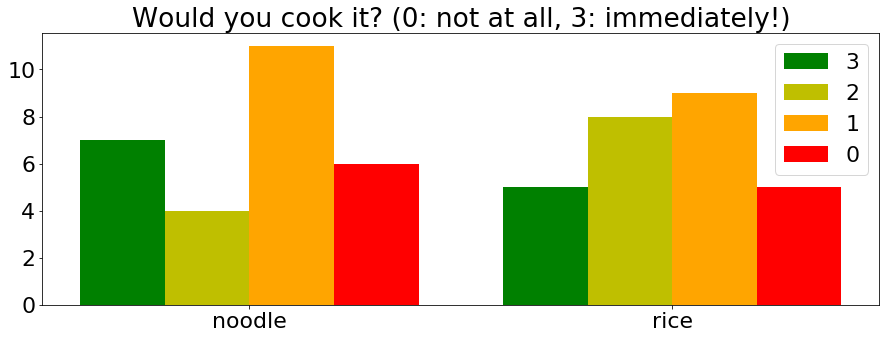

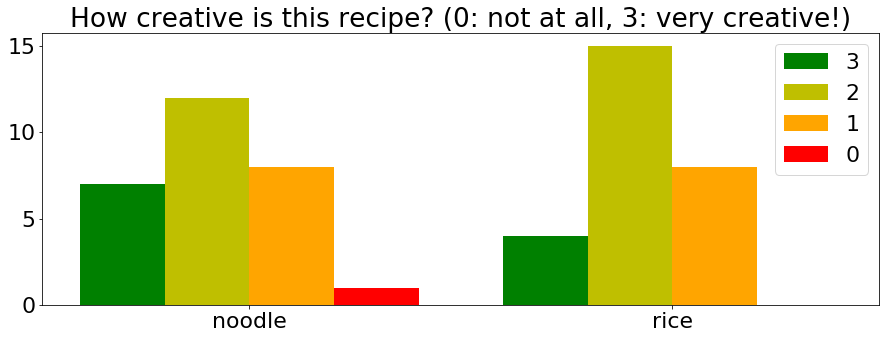

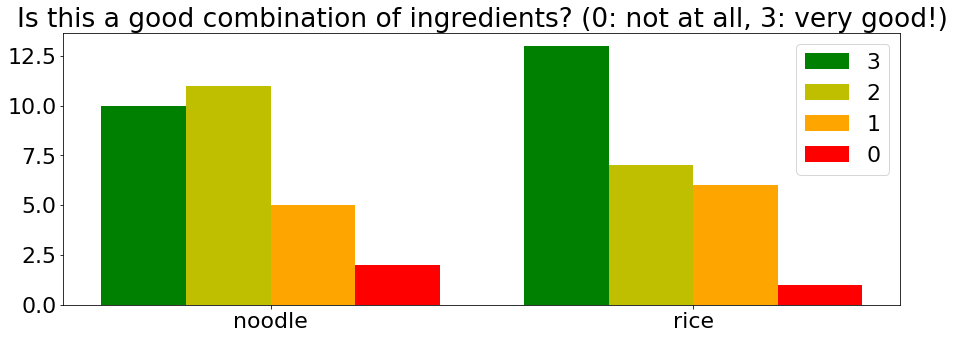

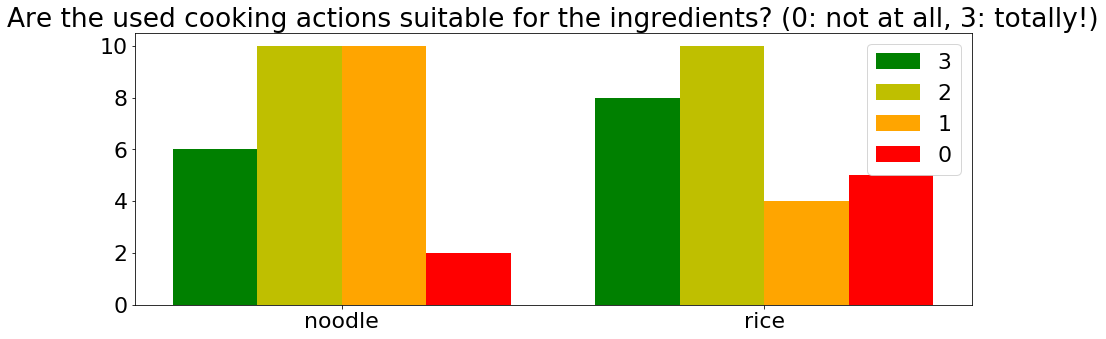

In [106]:
for q in range_questions:
    answer = get_range_group_answer(q)
    
    x = np.arange(len(answer[0])) 

    width = 0.2 # the width of the bars

    plt.rcParams['figure.figsize'] = (15,5)
    plt.rcParams.update({'font.size': 22})
    plt.bar(x = x-1.5*width, height=answer[1][3], width=width, label="3", color='g')
    plt.bar(x = x-width/2, height=answer[1][2], width=width, label="2", color='y')
    plt.bar(x = x+width/2, height=answer[1][1], width=width, label="1", color='orange')
    plt.bar(x = x+1.5*width, height=answer[1][0], width=width, label="0", color='r')
    plt.xticks(x, labels=answer[0], rotation=0)
    plt.title(q)
    plt.legend()
    plt.show()